In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
df=pd.read_csv('/home/pvg/70harsh/Admission_Predict - Admission_Predict.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [56]:
df.drop("Serial No.",axis=1,inplace=True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [57]:
df.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [58]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [59]:
cond=[(df['Chance of Admit']>=0.85),(df['Chance of Admit']<0.85)]
value=['1','0']
df['Admission']=np.select(cond,value)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Admission
0,337,118,4,4.5,4.5,9.65,1,0.92,1
1,324,107,4,4.0,4.5,8.87,1,0.76,0
2,316,104,3,3.0,3.5,8.00,1,0.72,0
3,322,110,3,3.5,2.5,8.67,1,0.80,0
4,314,103,2,2.0,3.0,8.21,0,0.65,0


In [60]:
df.drop('Chance of Admit',axis=1,inplace=True)

In [61]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,0
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,0
4,314,103,2,2.0,3.0,8.21,0,0


In [94]:
df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000


In [74]:
x=df.iloc[:,:-1]
y=df.Admission
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 7)
(80, 7)
(320,)
(80,)


In [78]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(random_state=0)
classifier.fit(x_train,y_train)
y_pred1=classifier.predict(x_train)
y_pred2=classifier.predict(x_test)

In [80]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score


cm_train=confusion_matrix(y_train,y_pred1)
print("Accuracy of Train set:",accuracy_score(y_train,y_pred1))
print("F1 score of Train set:",f1_score(y_train,y_pred1,average='weighted'))
print("Precision of Train set:",precision_score(y_train,y_pred1,average='weighted'))
print(cm_train)


cm_test= confusion_matrix(y_test, y_pred2)
print("Accuracy of Test set:",accuracy_score(y_test,y_pred2))
print("F1 score of Test set:",f1_score(y_test,y_pred2,average='weighted'))
print("Accuracy of Train set:",precision_score(y_test,y_pred2,average='weighted'))
print(cm_test)

Accuracy of Train set: 1.0
F1 score of Train set: 1.0
Precision of Train set: 1.0
[[248   0]
 [  0  72]]
Accuracy of Test set: 0.9
F1 score of Test set: 0.89765625
Accuracy of Train set: 0.8969230769230769
[[60  3]
 [ 5 12]]


[Text(0.625, 0.9, 'X[5] <= 9.165\ngini = 0.349\nsamples = 320\nvalue = [248, 72]'),
 Text(0.4166666666666667, 0.7, 'X[5] <= 9.055\ngini = 0.095\nsamples = 260\nvalue = [247, 13]'),
 Text(0.25, 0.5, 'X[0] <= 330.0\ngini = 0.033\nsamples = 237\nvalue = [233, 4]'),
 Text(0.16666666666666666, 0.3, 'X[5] <= 8.92\ngini = 0.025\nsamples = 236\nvalue = [233, 3]'),
 Text(0.08333333333333333, 0.1, '\n  (...)  \n'),
 Text(0.25, 0.1, '\n  (...)  \n'),
 Text(0.3333333333333333, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5833333333333334, 0.5, 'X[2] <= 3.5\ngini = 0.476\nsamples = 23\nvalue = [14, 9]'),
 Text(0.5, 0.3, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.6666666666666666, 0.3, 'X[0] <= 324.5\ngini = 0.48\nsamples = 15\nvalue = [6, 9]'),
 Text(0.5833333333333334, 0.1, '\n  (...)  \n'),
 Text(0.75, 0.1, '\n  (...)  \n'),
 Text(0.8333333333333334, 0.7, 'X[1] <= 109.0\ngini = 0.033\nsamples = 60\nvalue = [1, 59]'),
 Text(0.75, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')

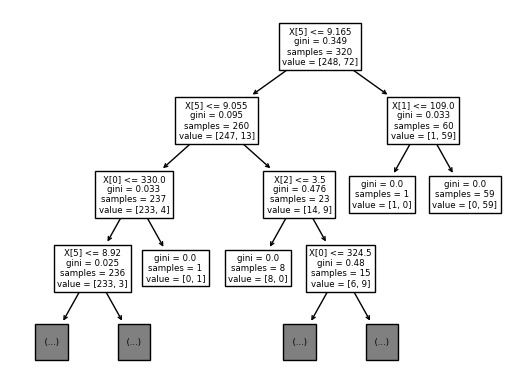

In [83]:
from sklearn.tree import plot_tree
plot_tree(classifier,max_depth=3)

In [86]:
classifier1=DecisionTreeClassifier(random_state=0,criterion='entropy')
classifier1.fit(x_train,y_train)
y_pred_1=classifier1.predict(x_train)
y_pred_2=classifier1.predict(x_test)

In [87]:
cm_train=confusion_matrix(y_train,y_pred_1)
print("Accuracy of Train set:",accuracy_score(y_train,y_pred_1))
print("F1 score of Train set:",f1_score(y_train,y_pred_1,average='weighted'))
print("Precision of Train set:",precision_score(y_train,y_pred_1,average='weighted'))
print(cm_train)


cm_test= confusion_matrix(y_test, y_pred_2)
print("Accuracy of Test set:",accuracy_score(y_test,y_pred_2))
print("F1 score of Test set:",f1_score(y_test,y_pred_2,average='weighted'))
print("Accuracy of Train set:",precision_score(y_test,y_pred_2,average='weighted'))
print(cm_test)

Accuracy of Train set: 1.0
F1 score of Train set: 1.0
Precision of Train set: 1.0
[[248   0]
 [  0  72]]
Accuracy of Test set: 0.95
F1 score of Test set: 0.948828125
Accuracy of Train set: 0.9494871794871795
[[62  1]
 [ 3 14]]
